In [2]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import torchmetrics as tm
import torch
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys,os

from portfolios.portfolio_new import Portfolio

Device: cpu
Epochs: 200
Random seed set at: 21


In [3]:
resultsPath = '../saved/results/'

In [4]:
GuEnsemblePath = resultsPath + 'NN3Ensemble/'
predicted_ret_path = GuEnsemblePath + 'predicted_returns/'
trial_info_path = GuEnsemblePath + 'trial_info/'

In [5]:
predicted_ret_files = [f for f in listdir(predicted_ret_path) if isfile(join(predicted_ret_path, f))]
trial_info_files = [f for f in listdir(trial_info_path) if isfile(join(trial_info_path, f))]

In [6]:
returns = pd.DataFrame()

for idx, file in enumerate(predicted_ret_files):
    df = pd.read_csv(predicted_ret_path + '/' + file, index_col=0)
    df = df.rename({'predicted_ret': 'predicted_ret_'+str(idx)}, axis=1)
    if idx == 0:
        # returns = returns.reindex(columns=df.columns.tolist())
        returns = pd.concat([returns, df], axis=1)

    else:
        returns = pd.concat([returns, df.iloc[:,-1]], axis=1)

In [7]:
returns['predicted_ret'] = returns.iloc[:,3:].mean(axis=1)

In [8]:
returns = returns[['permno','yyyymm','ret', 'predicted_ret']]

In [9]:
import torchmetrics
import torch

spear = torchmetrics.SpearmanCorrCoef()
spearman = spear(torch.tensor(returns['ret']),torch.tensor(returns['predicted_ret']))

/home/ge65cuw/anaconda3/envs/thesis/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [10]:
print(f'Spearman correlation coefficient: {spearman.item():.4f}')

Spearman correlation coefficient: 0.0716


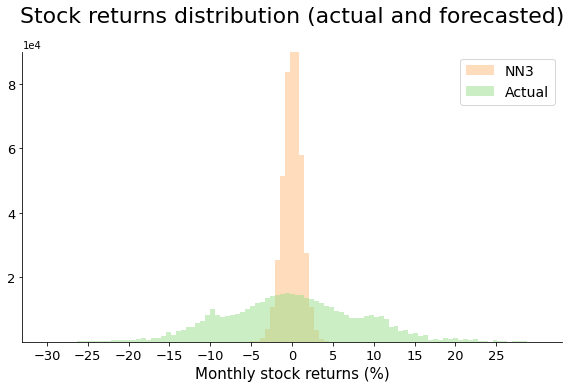

In [11]:
# Remove the plot frame lines. They are unnecessary chartjunk.
# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare  
# exception because of the number of lines being plotted on it.  
# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(8, 5.5))

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.title("Stock returns distribution (actual and forecasted)\n", fontsize=22)


# Distribution of actual returns and predicted returns
bins = np.linspace(-30, 30, 100)
x1 = returns['predicted_ret']
x2 = returns['ret']
plt.hist(x1, bins, alpha=0.5, label='NN3', color=tableau20[3])
plt.hist(x2, bins, alpha=0.5, label='Actual', color=tableau20[5])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xticks(range(-30, 30, 5), fontsize=13)
plt.yticks(range(0, 120000, 20000), fontsize=13)
plt.legend(loc='upper right', fontsize=14)
plt.xlabel("Monthly stock returns (%)", fontsize=15)
plt.ylim(1, 90000)

plt.tight_layout()
plt.show()

# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.
# plt.savefig("Returns_distribution.png", bbox_inches="tight")


# Portfolio calculation

In [12]:
portfolioVW = Portfolio(returns, weighting='VW')
# portfolioEW = Portfolio(returns, weighting='EW')

IR & alpha calculation...
Params
const     1.320835
Mkt-RF   -0.035181
SMB      -0.181539
HML       0.240869
RMW       0.127073
CMA       0.317146
Mom       0.028771
ST_Rev    0.004195
dtype: float64
tValues
const     5.975252
Mkt-RF   -0.607669
SMB      -2.438297
HML       2.593207
RMW       1.304576
CMA       2.342783
Mom       0.602869
ST_Rev    0.069018
dtype: float64
Linear Regression summary:
                            OLS Regression Results                            
Dep. Variable:                    l-s   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     9.986
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           3.59e-11
Time:                        11:12:37   Log-Likelihood:                -785.55
No. Observations:                 296   AIC:                             1587.
Df Residuals:                     288   BIC: 

In [13]:
# portfolioVW.plot_cumulative_returns(path=None)

In [14]:
portfolioVW.regress_on_FF5FM(method='long')

IR & alpha calculation...
Params
const     0.529910
Mkt-RF   -0.037006
SMB      -0.639849
HML       0.233324
RMW      -0.038392
CMA       0.167272
Mom       0.048490
ST_Rev   -0.026214
dtype: float64
tValues
const      3.961545
Mkt-RF    -1.056284
SMB      -14.201959
HML        4.151173
RMW       -0.651356
CMA        2.041973
Mom        1.679058
ST_Rev    -0.712709
dtype: float64
Linear Regression summary:
                            OLS Regression Results                            
Dep. Variable:                     10   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     49.85
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           4.00e-46
Time:                        11:12:49   Log-Likelihood:                -636.86
No. Observations:                 296   AIC:                             1290.
Df Residuals:                     288

In [15]:
portfolioVW._calculate_metrics()

Average return:
	Long: 0.49%	Long-short: 1.45%
T is 296
Annualized returns:
	Long: 5.38%	Long-short:17.80%
Standard deviation on returns:
	Long: 3.09	Long-short:3.83
Sharpe ratio:
	Long: 1.74	Long-short:4.64
Weight columns = Index(['yyyymm', 'total_melag'], dtype='object')
   yyyymm  market_ret
0  197601    0.000000
1  197602   -0.057624
2  197603    2.375386
3  197604   -1.474004
4  197605   -1.282115
     yyyymm  market_ret
0    197601    0.000000
1    197602   -0.057624
2    197603    2.375386
3    197604   -1.474004
4    197605   -1.282115
..      ...         ...
535  202008    7.645680
536  202009   -3.641317
537  202010   -2.086130
538  202011   12.324246
539  202012    4.597379

[540 rows x 2 columns]


### Check why return is not in the middle

In [16]:
print('Average Long returns: %.2f'%portfolioVW.returns.iloc[:,-2].mean()+'%')
print('Standard Dev. Long returns %.2f'%portfolioVW.returns.iloc[:,-2].std())

Average Long returns: 0.49%
Standard Dev. Long returns 3.10


In [17]:
from portfolios.market_portfolio import MarketPortfolio
mp = MarketPortfolio()

Weight columns = Index(['yyyymm', 'total_melag'], dtype='object')
   yyyymm  market_ret
0  197601    0.000000
1  197602   -0.057624
2  197603    2.375386
3  197604   -1.474004
4  197605   -1.282115


In [18]:
import data.data_preprocessing as dp
import pandas as pd
import numpy as np

# Load CRSP
crsp = dp.load_crsp()
crsp = dp.remove_microcap_stocks(crsp, keep_big_only=True)
crsp = dp.filter_exchange_code(crsp)
crsp = dp.filter_share_code(crsp)
crsp = dp.calculate_excess_returns(crsp)

crsp = crsp.drop(['siccd', 'me_nyse20','me_nyse50'], axis=1, errors='ignore')

TypeError: remove_microcap_stocks() got an unexpected keyword argument 'keep_big_only'

In [ ]:
crsp.head()

,permno,yyyymm,ret,melag,prc,me,StockSize,RF
0,10006.0,197001,-5.957143,276409.000,46.375,261601.375,Big,0.6
1,10102.0,197001,3.216794,180714.500,17.000,187612.000,Big,0.6
2,10137.0,197001,-7.266667,428835.000,19.250,400246.000,Big,0.6
3,10145.0,197001,-4.189744,676284.375,23.500,652007.500,Big,0.6
4,10153.0,197001,13.685715,224490.000,24.000,256560.000,Big,0.6


In [ ]:
from portfolios.market_portfolio import MarketPortfolio
mp_big = MarketPortfolio(big_stocks_only=True)

TypeError: remove_microcap_stocks() got an unexpected keyword argument 'keep_big_only'